# https://www.tensorflow.org/tutorials/keras/basic_text_classification

In [2]:
import pandas as pd
import numpy as np

from farhad.AwesomeTextTools import text_into_sequence_of_integers
from farhad.AwesomeTextTools import text_into_sequence_of_integers_with_glove_dictionary

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


---------------------------------------------------------
*** First def ***
text_into_sequence_of_integers

inputs: croups_df, dictunary, model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------
---------------------------------------------------------
*** second def ***
text_into_sequence_of_integers_with_glove_dictionary

inputs: croups_df,  model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------


In [18]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences 


from sklearn.model_selection import train_test_split  


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer 

In [101]:
df = pd.read_csv('data/tesla_label_twoprice_andtopic.csv')
df = df.dropna()
df.head(3)

,created_at,text,label_topicModels,Price_label,"Price_label(0,1)"
0,2011-01-18,watch slammed suv blowing red light mph miami ...,1,-1,0
1,2011-01-19,tesla xyecla,1,-1,0
2,2011-01-21,yep tesla going take world structurally unprofi,1,2,1


In [102]:
Embadding, sequence = text_into_sequence_of_integers(df['text'], df['text'], model='tfidf')
x_train, x_test, y_train, y_test = train_test_split(Embadding,df['Price_label(0,1)'], test_size=0.25, random_state=42)

In [20]:
print("Training entries: {}, labels: {}".format(len(x_train), len(y_train)))

Training entries: 449, labels: 449


In [13]:
d = df.groupby('Price_label(0,1)').sum()

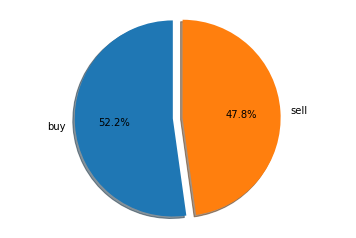

In [16]:
import matplotlib.pyplot as plt

labels = 'buy', 'sell'
explode = [0.1,0]
fig1, ax1 = plt.subplots()
ax1.pie(d['label_topicModels'],explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
import glove
import os
glove_dir = './data/RNN/'
glove_100k_50d = 'glove.first-100k.6B.50d.txt'
glove_100k_50d_path = os.path.join(glove_dir, glove_100k_50d)
word_embedding = glove.Glove.load_stanford( glove_100k_50d_path )
word_embedding.word_vectors.shape

(100000, 50)

In [25]:
seq = [x.split() for x in df['text']]
dic = []
for x in seq:
    for i in x:
        dic.append(i)
dic = set(dic)

In [35]:
char2idx = {u:i for i, u in enumerate(dic)}
idx2char = np.array(dic)
text_as_int = np.array([char2idx[c] for c in dic])

In [41]:
word_index = imdb.get_word_index()

In [43]:
#word_index

In [103]:
train_data = pad_sequences(x_train, padding='post', maxlen=140)
test_data = pad_sequences(x_test, padding='post', maxlen=140)

In [48]:
len(train_data[0]), len(train_data)

(140, 140)

# model

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAvgPool1D, LSTM, Dropout, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from farhad_DL.utils import Estimate_fasterD,plot_training_summary,TimeSummary
from farhad_DL.utility import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from farhad.utility import encode_text_dummy, to_xy

In [85]:
#encode_text_dummy(df,'Price_label(0,1)')

In [89]:
#x_train, x_test, y_train, y_test = train_test_split(Embadding,df[['Price_label(0,1)-0','Price_label(0,1)-1']], test_size=0.25, random_state=42)

In [104]:
df.head()

,created_at,text,label_topicModels,Price_label,"Price_label(0,1)"
0,2011-01-18,watch slammed suv blowing red light mph miami ...,1,-1,0
1,2011-01-19,tesla xyecla,1,-1,0
2,2011-01-21,yep tesla going take world structurally unprofi,1,2,1
3,2011-02-01,introducing dog mode set cabin temperature kee...,0,1,1
4,2011-02-11,wheeled electricvehicle company could next tes...,1,-1,0


In [ ]:
# def text_classfication_model(vocab_size):
    
    model = Sequential()
    model.add(Embedding(vocab_size, 32))
    model.add(GlobalAvgPool1D())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [88]:
vocab_size = len(dic)
model = text_classfication_model(vocab_size )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          48512     
_________________________________________________________________
global_average_pooling1d_15  (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 18        
Total params: 50,250
Trainable params: 50,250
Non-trainable params: 0
_________________________________________________________________


In [90]:
epochs = 500

time_summary = TimeSummary()
estimator = Estimate_fasterD(epochs)
model = text_classfication_model(vocab_size )
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_data,
                    y_train,
                    epochs=epochs,
                    batch_size=1,
                    validation_split=0.20,
                    verbose=0,
                    callbacks=[time_summary,estimator])

/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[499/500]

Training time: 0:12:36.888339(HH:MM:SS)
Epoch time avg: 0:00:01.513756(HH:MM:SS)


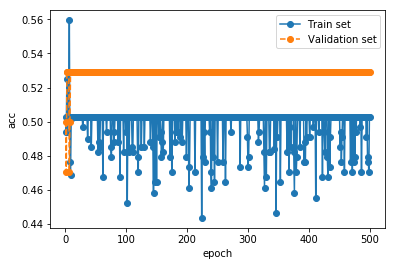

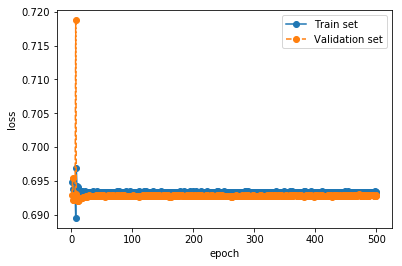

In [91]:
plot_training_summary(history,time_summary)

In [99]:
pred = model.predict(test_data)
pred2 = np.argmax(pred,axis=1)


cm2 = confusion_matrix(y_test,pred)
plot_confusion_matrix(cm2,['buy','sell'])

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [152]:
word_embds = model2.layers[0].get_weights()

In [153]:
word_embds

[array([[0.7932487 , 0.4433037 , 0.8638878 , ..., 0.08673707, 0.23041134,
         0.43919098],
        [0.56094587, 0.93337446, 0.4445017 , ..., 0.76240015, 0.6052808 ,
         0.29593068],
        [0.14502327, 0.4944555 , 0.85438144, ..., 0.7206202 , 0.11338228,
         0.54137677],
        ...,
        [0.42807317, 0.65610254, 0.20323002, ..., 0.34878957, 0.7383789 ,
         0.89657223],
        [0.00788283, 0.73028886, 0.9596815 , ..., 0.6643481 , 0.47702324,
         0.3896134 ],
        [0.5511937 , 0.9643214 , 0.28273928, ..., 0.5942067 , 0.28475344,
         0.8558804 ]], dtype=float32)]

In [161]:
from keras.preprocessing.text import Tokenizer
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
#tokenizer.fit_on_texts(df['text'])
#sequences = tokenizer.texts_to_sequences(df['text'])
#data = pad_sequences(sequences, maxlen=50)

In [162]:
ist = []
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

In [163]:
    word_list

[]

In [56]:
print(len(y_test) - y_test.values.sum(),y_test.values.sum())

67

In [57]:
print((y_train))

46

In [ ]:
# secound model

In [121]:
np.shape(x_train)

(421,)

In [ ]:
seq = [x.split() for x in df['text']]
dic = []
for x in seq:
    for i in x:
        dic.append(i)
dic = set(dic)

In [146]:
def second_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size,16))
    model.add(MaxPool1D())
    model.add(Dropout(rate=0.2))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [148]:
vocab_size = len(dic)
model2 = second_model(vocab_size)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, None, 16)          24256     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 5         
Total params: 26,441
Trainable params: 26,441
Non-trainable params: 0
_________________________________________________________________


In [150]:
epochs = 100
vocab_size = len(dic)

time_summary = TimeSummary()
estimator = Estimate_fasterD(epochs)

model2 = second_model(vocab_size)
history = model2.fit(train_data,
                    y_train,
                    epochs=epochs,
                    batch_size=60,
                    validation_split=0.20,
                    verbose=0,
                    callbacks=[time_summary,estimator])

[99/100]

Training time: 0:02:23.048789(HH:MM:SS)
Epoch time avg: 0:00:01.430463(HH:MM:SS)


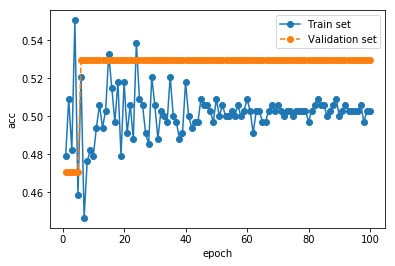

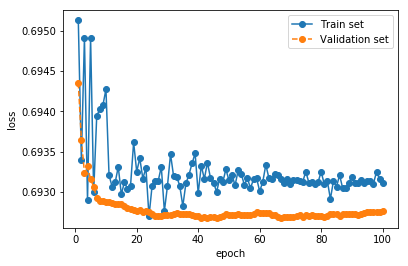

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [151]:
plot_training_summary(history,time_summary)

pred = model2.predict(test_data)
pred2 = np.argmax(pred,axis=1)

print(pred2)

In [135]:
cm2 = confusion_matrix(y_test,pred2)
plot_confusion_matrix(cm2,['buy','sell'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Third Model

In [ ]:
def glove_model():
    model = S